In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys
sys.path.append('../')
from cython_folder.TTM.ttm import TTM

In [2]:
N_tdv = pd.read_pickle('../pickle_folder/q30/questions_bow_arr_train.pkl')

#N_tdv_train = pd.read_pickle('../pickle_folder/q30/questions_bow_arr_train.pkl')
#N_tdv_test = pd.read_pickle('../pickle_folder/q30/questions_bow_arr_test.pkl')

Q_tds = pd.read_pickle('../pickle_folder/auxiliary/questions_meta_arr.pkl')
Age_td = Q_tds[:, :, 1]
#for t in range(Age_td.shape[0]):
#    Age_td[t] = np.log1p(Age_td[t] - np.min(Age_td[t]))

In [3]:
# 学習
# k: トピック数, L: 依存時間数, N: 時刻毎のBOW行列
ttm = TTM(K=25, L=1, N_tdv=N_tdv[0:1,:550,:], Age_td=Age_td[0:1,:550])
# ttm_estimateの引数: 反復数
ttm.ttm_estimate(100)

100%|██████████| 100/100 [00:28<00:00,  3.51it/s]


In [4]:
print(np.array(ttm.mse_t))
print(np.array(ttm.r_score_t))

[379.2355412]
[0.05246776]


In [3]:
# 学習
# k: トピック数, L: 依存時間数, N: 時刻毎のBOW行列
ttm = TTM(K=20, L=1, N_tdv=N_tdv, Age_td=Age_td)
# ttm_estimateの引数: 反復数
ttm.ttm_estimate(100)

100%|██████████| 100/100 [02:43<00:00,  1.64s/it]


In [9]:
#pd.to_pickle(np.array(ttm.z_tdk_var[0]), '../pickle_folder/ttm_train/q30_ttm_z_tdk_var.pkl')

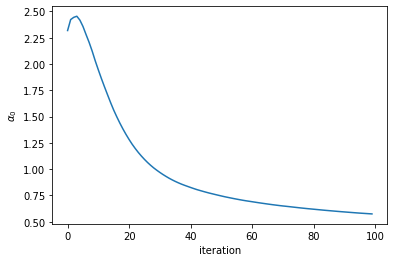

In [4]:
plt.plot(range(len(ttm.alpha_list)), ttm.alpha_list)
#plt.plot(range(len(temp_alpha_list)), temp_alpha_list)
plt.ylabel(r"$\alpha_0$")
plt.xlabel("iteration")
#plt.savefig("./images/first_alpha0.png")
plt.show()

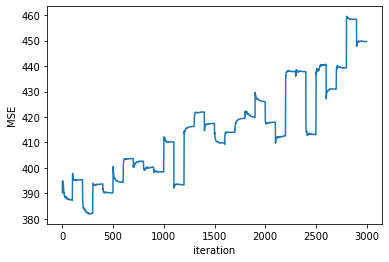

In [4]:
plt.plot(range(len(ttm.mse_list)), ttm.mse_list)
plt.ylabel("MSE")
plt.xlabel("iteration")
#plt.savefig("../images/mse_q30_cttm.png")
plt.show()

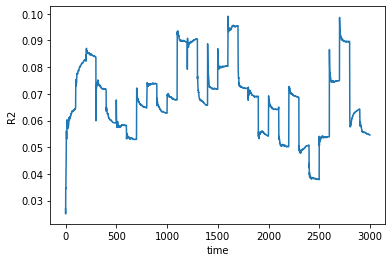

In [6]:
plt.plot(range(len(ttm.r_score)), ttm.r_score)
plt.ylabel("R2")
plt.xlabel("time")
#plt.savefig("../images/mse_time_q30_scttm.png")
plt.show()

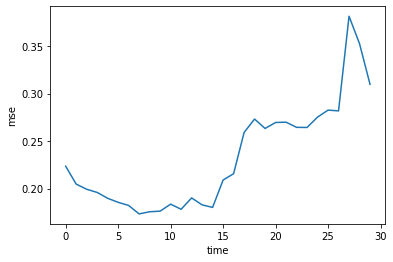

In [5]:
plt.plot(range(len(ttm.mse_t)), ttm.mse_t)
plt.ylabel("mse")
plt.xlabel("time")
#plt.savefig("../images/mse_time_q30_scttm.png")
plt.show()

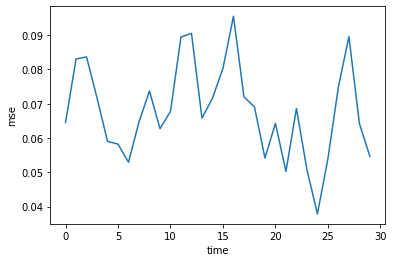

In [8]:
plt.plot(range(len(ttm.r_score_t)), ttm.r_score_t)
plt.ylabel("r2")
plt.xlabel("time")
#plt.savefig("../images/mse_time_q30_scttm.png")
plt.show()

In [6]:
for k in range(ttm.K):
    phi_list = np.array(ttm.phi_tkv[0][k])
    print(list(np.argsort(-phi_list))[:20])

[94, 181, 32, 25, 150, 156, 426, 463, 320, 7, 14, 34, 68, 49, 96, 814, 155, 1409, 389, 882]
[172, 17, 128, 301, 885, 613, 374, 102, 463, 94, 1, 141, 200, 33, 77, 228, 224, 513, 53, 725]
[726, 1217, 1057, 69, 811, 148, 1498, 326, 32, 9, 67, 87, 754, 1227, 77, 39, 688, 145, 362, 776]
[13, 60, 16, 93, 82, 174, 30, 25, 354, 535, 798, 20, 390, 46, 88, 226, 383, 374, 35, 11]
[13, 888, 321, 604, 360, 92, 120, 746, 68, 1181, 1245, 618, 920, 54, 967, 868, 660, 17, 238, 383]
[147, 122, 2, 92, 151, 365, 346, 160, 58, 124, 163, 99, 191, 275, 89, 196, 45, 29, 57, 16]
[297, 60, 29, 9, 296, 281, 310, 635, 158, 288, 18, 1498, 305, 76, 607, 498, 689, 610, 892, 528]
[14, 53, 99, 1, 45, 201, 684, 525, 67, 282, 764, 3, 600, 176, 83, 490, 614, 44, 181, 244]
[284, 67, 353, 68, 421, 108, 346, 297, 287, 364, 151, 1068, 13, 417, 329, 302, 1018, 253, 47, 257]
[3, 92, 476, 484, 865, 101, 40, 642, 1421, 84, 525, 722, 69, 1145, 678, 70, 1018, 991, 358, 1021]
[952, 150, 149, 589, 334, 426, 17, 3, 213, 165, 983, 512

In [4]:
# データ保存
"""
pd.to_pickle(np.array(ttm.theta_tdk), '../pickle_folder/q30_ttm/q30_theta.pkl')
pd.to_pickle(np.array(ttm.phi_tkv), '../pickle_folder/q30_ttm/q30_phi.pkl')
pd.to_pickle(np.array(ttm.alpha_tdl), '../pickle_folder/q30_ttm/q30_alpha.pkl')
pd.to_pickle(np.array(ttm.beta_tkl), '../pickle_folder/q30_ttm/q30_beta.pkl')
pd.to_pickle(np.array(ttm.r_score_t), '../pickle_folder/q30_ttm/q30_ttm_r_score_t.pkl')
pd.to_pickle(np.array(ttm.mse_t), '../pickle_folder/q30_ttm/q30_ttm_mse_t.pkl')
pd.to_pickle(np.array(ttm.r_score), '../pickle_folder/q30_ttm/q30_ttm_r_score.pkl')
pd.to_pickle(np.array(ttm.mse_list), '../pickle_folder/q30_ttm/q30_ttm_mse_list.pkl')
pd.to_pickle(np.array(ttm.eta_tk), '../pickle_folder/q30_ttm/q30_ttm_eta_tk.pkl')

In [5]:
# 訓練データ保存
"""
pd.to_pickle(np.array(ttm.theta_tdk), '../pickle_folder/ttm_train/q30_theta.pkl')
pd.to_pickle(np.array(ttm.phi_tkv), '../pickle_folder/ttm_train/q30_phi.pkl')
pd.to_pickle(np.array(ttm.alpha_tdl), '../pickle_folder/ttm_train/q30_alpha.pkl')
pd.to_pickle(np.array(ttm.beta_tkl), '../pickle_folder/ttm_train/q30_beta.pkl')
pd.to_pickle(np.array(ttm.r_score_t), '../pickle_folder/ttm_train/q30_ttm_r_score_t.pkl')
pd.to_pickle(np.array(ttm.mse_t), '../pickle_folder/ttm_train/q30_ttm_mse_t.pkl')
pd.to_pickle(np.array(ttm.r_score), '../pickle_folder/ttm_train/q30_ttm_r_score.pkl')
pd.to_pickle(np.array(ttm.mse_list), '../pickle_folder/ttm_train/q30_ttm_mse_list.pkl')
pd.to_pickle(np.array(ttm.eta_tk), '../pickle_folder/ttm_train/q30_ttm_eta_tk.pkl')